<a href="https://colab.research.google.com/github/nekotanku/colab/blob/master/%E3%82%AB%E3%82%B9%E3%82%BF%E3%83%A0%E3%83%87%E3%83%BC%E3%82%BF%E3%82%BB%E3%83%83%E3%83%88_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
!ls drive/My\ Drive/ソースコード

'AutoEncoder (1).ipynb'			   PyTorchの基礎.ipynb
 AutoEncoder.ipynb			   ResNet.ipynb
 CNN_CIFAR10.ipynb			   train.zip
 CNNによるCIFAR10の分類_データ拡張.ipynb   Udemy_pytorch_dataset.ipynb
 CNN_CIFAR10_データ拡張.ipynb		   Udemy_pytorch_LSTM.ipynb
 カスタムデータセット.ipynb		  '線形回帰 (1).ipynb'
 LSTM.ipynb				   線形回帰.ipynb
 MLPによるMNISTの分類_モデルの保存.ipynb   自動微分.ipynb
 MNIST.ipynb				   転移学習.ipynb
 pytorch_CNN.ipynb			   転移学習_pytorch.ipynb


In [6]:
!unzip drive/My\ Drive/ソースコード/train.zip

Archive:  drive/My Drive/ソースコード/train.zip
  inflating: train/cat.0.jpg         
  inflating: train/cat.1.jpg         
  inflating: train/cat.10.jpg        
  inflating: train/cat.100.jpg       
  inflating: train/cat.101.jpg       
  inflating: train/cat.102.jpg       
  inflating: train/cat.103.jpg       
  inflating: train/cat.104.jpg       
  inflating: train/cat.105.jpg       
  inflating: train/cat.106.jpg       
  inflating: train/cat.107.jpg       
  inflating: train/cat.108.jpg       
  inflating: train/cat.109.jpg       
  inflating: train/cat.11.jpg        
  inflating: train/cat.110.jpg       
  inflating: train/cat.111.jpg       
  inflating: train/cat.112.jpg       
  inflating: train/cat.113.jpg       
  inflating: train/cat.114.jpg       
  inflating: train/cat.115.jpg       
  inflating: train/cat.116.jpg       
  inflating: train/cat.117.jpg       
  inflating: train/cat.118.jpg       
  inflating: train/cat.119.jpg       
  inflating: train/cat.12.jpg        
  inflat

In [7]:
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader, Dataset, ConcatDataset
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

In [9]:
!ls train

cat.0.jpg    cat.28.jpg  cat.65.jpg   dog.102.jpg  dog.30.jpg  dog.68.jpg
cat.100.jpg  cat.29.jpg  cat.66.jpg   dog.103.jpg  dog.31.jpg  dog.69.jpg
cat.101.jpg  cat.2.jpg	 cat.67.jpg   dog.104.jpg  dog.32.jpg  dog.6.jpg
cat.102.jpg  cat.30.jpg  cat.68.jpg   dog.105.jpg  dog.33.jpg  dog.70.jpg
cat.103.jpg  cat.31.jpg  cat.69.jpg   dog.106.jpg  dog.34.jpg  dog.71.jpg
cat.104.jpg  cat.32.jpg  cat.6.jpg    dog.107.jpg  dog.35.jpg  dog.72.jpg
cat.105.jpg  cat.33.jpg  cat.70.jpg   dog.108.jpg  dog.36.jpg  dog.73.jpg
cat.106.jpg  cat.34.jpg  cat.71.jpg   dog.109.jpg  dog.37.jpg  dog.74.jpg
cat.107.jpg  cat.35.jpg  cat.72.jpg   dog.10.jpg   dog.38.jpg  dog.75.jpg
cat.108.jpg  cat.36.jpg  cat.73.jpg   dog.110.jpg  dog.39.jpg  dog.76.jpg
cat.109.jpg  cat.37.jpg  cat.74.jpg   dog.111.jpg  dog.3.jpg   dog.77.jpg
cat.10.jpg   cat.38.jpg  cat.75.jpg   dog.112.jpg  dog.40.jpg  dog.78.jpg
cat.110.jpg  cat.39.jpg  cat.76.jpg   dog.113.jpg  dog.41.jpg  dog.79.jpg
cat.111.jpg  cat.3.jpg	 cat.77.jpg   dog

In [10]:
file_list = os.listdir('./train')

In [11]:
cat_files  = [file_name for file_name in file_list if "cat" in file_name]
dog_files = [file_name for file_name in file_list if "dog" in file_name]

In [12]:
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor()
])

In [13]:
class CatDogDataset(Dataset):
    def  __init__(self, file_list, dir, transform=None):
        self.file_list = file_list
        self.dir = dir
        self.transform = transform
        if "dog" in self.file_list[0]:
            self.label = 1
        else:
            self.label = 0
    def __len__(self):
        return len(self.file_list)
    def __getitem__(self, idx):
        file_path = os.path.join(self.dir, self.file_list[idx])
        img = Image.open(file_path)
        if self.transform is not None:
            img = self.transform(img)
        return img, self.label

In [14]:
dir_path = "train/"
cat_dataset = CatDogDataset(cat_files, dir_path, transform=transform)
dog_dataset = CatDogDataset(dog_files, dir_path, transform=transform)


In [15]:
cat_dog_dataset = ConcatDataset([cat_dataset, dog_dataset])

In [16]:
data_loader = DataLoader(cat_dog_dataset, batch_size=32, shuffle=True)

In [17]:
data_iter = iter(data_loader)

In [18]:
imgs, labels = data_iter.next()

In [20]:
labels

tensor([0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
        0, 0, 0, 0, 1, 1, 1, 1])

In [21]:
grid_imgs = torchvision.utils.make_grid(imgs[:24])

In [22]:
grid_imgs_arr = grid_imgs.numpy()

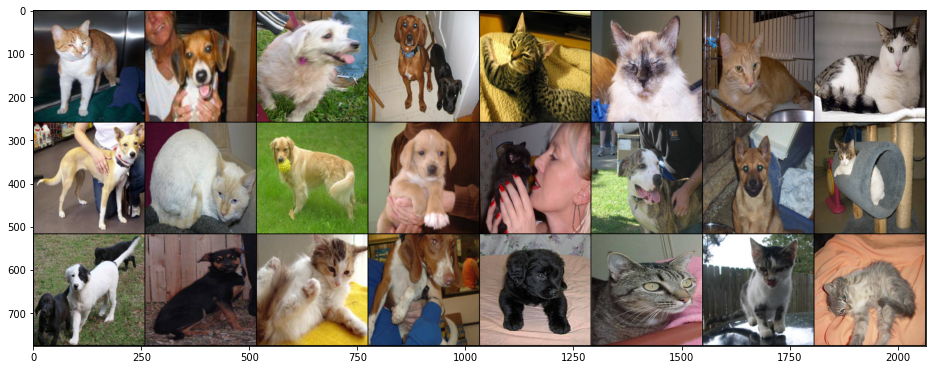

In [23]:
plt.figure(figsize=(16,24))
plt.imshow(np.transpose(grid_imgs_arr, (1, 2, 0)))